In [2]:
from utils import run_modified_seir_ivp, seir_ivp
import numpy as np
from scipy.integrate import solve_ivp
from plot import plot_timeseries

## 0% Epidemic Size, 50% of Remaining S

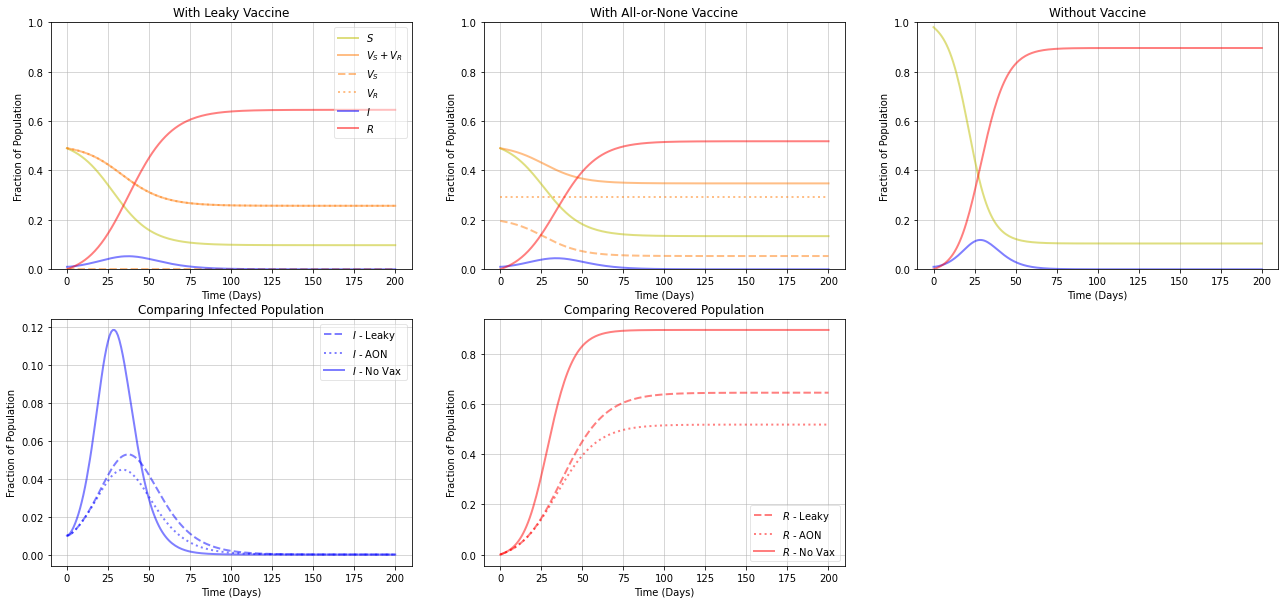

In [6]:
# set parameter values
sigma = 1/4; gamma = 1/4; beta = 2.5 * gamma; eps = 0.6; fc = 1/eps * (1 - 1/2.5)
t = 200; tv = -1; v = 0.02 # ln2 / 30.5 (half of S vaccinated by 30 days?)

# set initial conditions
s0 = 0.98; e0 = 0.01; i0 = 0.01; r0 = 0; fv = 0.5*s0
y0 = [s0, e0, i0, r0]

# no vaccination
sol = solve_ivp(seir_ivp, [0, t], y0, args=(beta, sigma, gamma), dense_output=True, t_eval = np.linspace(0, t, t+1))

### run model
# leaky
sim_leaky_0_below = run_modified_seir_ivp(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
sim_aon_0_below = run_modified_seir_ivp(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'aon')

### plot time-series plot
plot_timeseries(sol.y, sim_leaky_0_below, sim_aon_0_below, savefig=True, filename='timeseries_tv0_S50')

## 10% Epidemic Size, 50% of Remaining S

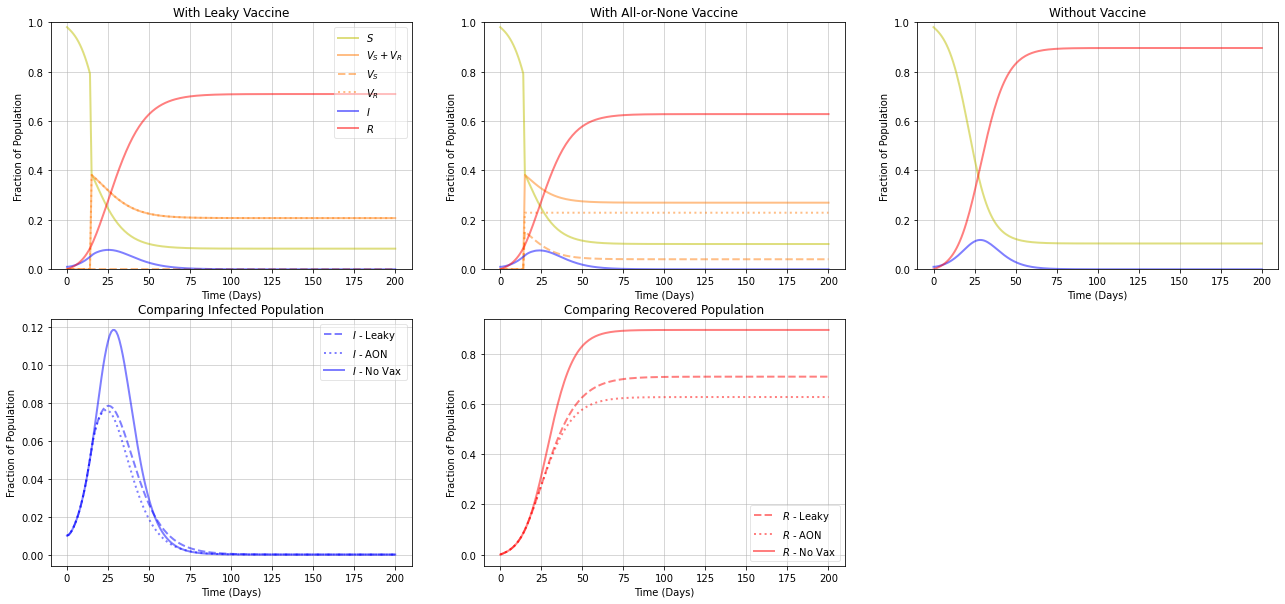

In [8]:
# common parameter values
sigma = 1/4; gamma = 1/4; beta = 2.5 * gamma; eps = 0.6
t = 200; v = 0.02

# set initial conditions
s0 = 0.98; e0 = 0.01; i0 = 0.01; r0 = 0
y0 = [s0, e0, i0, r0]

# no vaccination
sol = solve_ivp(seir_ivp, [0, t], y0, args=(beta, sigma, gamma), dense_output=True, t_eval = np.linspace(0, t, t+1))

# set fc
def _reach_size10(t, y, beta, sigma, gamma): return y[3] - 0.1
_reach_size10.terminate=True

sol = solve_ivp(seir_ivp, [0, t], y0, args=(beta, sigma, gamma), events=_reach_size10, dense_output=True, t_eval = np.linspace(0, t, t+1))
s_temp = np.ravel(np.array(sol.y_events[0]))[0]
tv = int(np.round(np.ravel(np.array(sol.t_events))[0]))
fc = 1/eps * (1 - 1/(2.5*s_temp))
fv = 0.5*s_temp

### change in R is probably very subtle - I at time of vacacination is 0.0566

### run model
# leaky
sim_leaky_0_below = run_modified_seir_ivp(y0, t, tv, beta, sigma, gamma, fv, eps, mode = 'leaky')

# aon
sim_aon_0_below = run_modified_seir_ivp(y0, t, tv, beta, sigma, gamma, fv, eps,mode = 'aon')

### plot time-series plot
plot_timeseries(sol.y, sim_leaky_0_below, sim_aon_0_below, savefig=True, filename='timeseries_tv10_S50')